In [ ]:
# 그래프에 한글 폰트 사용하는 코드 -> 실행 후 [런타임]-[런타임 다시 시작] 메뉴를 이용하여 런타임 재시작!
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 수행

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family="NanumBarunGothic")

# 문제 1) 가장 무더웠던 날이 언제이며, 이날의 평균 기온, 평균 풍속, 최대풍속을 구하시오.

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#코랩에서 데이터 파일을 사용하기 위해 직접 업로드하는 코드
from google.colab import files
files.upload()

In [ ]:
df = pd.read_csv('weather.csv', encoding='CP949') # 확장 완성형, MS

In [ ]:
df.shape # index: 0~3562 #column

(3653, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      3653 non-null   object 
 1   평균기온    3653 non-null   float64
 2   최대풍속    3649 non-null   float64
 3   평균풍속    3647 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.3+ KB


In [ ]:
df.describe() # mean(): 평균, std: 표준편차, 50%: 딱 반 75분위, 25분위

,평균기온,최대풍속,평균풍속
count,3653.000000,3649.000000,3647.000000
mean,12.942102,7.911099,3.936441
std,8.538507,3.029862,1.888473
min,-9.000000,2.000000,0.200000
25%,5.400000,5.700000,2.500000
50%,13.800000,7.600000,3.600000
75%,20.100000,9.700000,5.000000
max,31.300000,26.000000,14.900000


In [ ]:
# 결측치 구하기
df.isnull().sum() # 속성별로 결측치를 세어줌
# df['평균풍속'].isnull().sum()

6

In [ ]:
# 평균기온의 최솟값, 평균기온의 최소값은 -9.000000도 입니다.
a = df['평균기온'].min()
print(f"평균기온의 최솟값은 {df['평균기온'].min():.6f}도 입니다.")

평균기온의 최솟값은 -9.000000도 입니다.


In [ ]:
# 31.1도인 날의 일시를 구하시오.
hot = df['평균기온'].max()
hotday = df['일시'][df['평균기온'] == hot]

In [ ]:
type(hotday)
# hotday

pandas.core.series.Series

In [ ]:
print(f"가장 더웠던 날은 {hotday[1103]}로 {hot}도 입니다.")
print(f"가장 더웠던 날은 {df['일시'][1103]}로 {hot}도 입니다.")

가장 더웠던 날은 2013-08-08로 31.3도 입니다.
가장 더웠던 날은 2013-08-08로 31.3도 입니다.


In [ ]:
hottest = df.loc[df['평균기온']==hot] # 축 방향이 가로

print("가장 무더웠던 날")
print("="*50)
hottest

가장 무더웠던 날


,일시,평균기온,최대풍속,평균풍속
1103,2013-08-08,31.3,7.8,4.6


# **문제2) 울릉도의 평균기온이 30도가 넘는 날을 찾아, 이날의 기상데이터를 나열해 보시오.

In [ ]:
hottest1 = df.loc[df['평균기온'] > 30]

print("평균기온이 30도가 넘는 날")
print("="*50)
hottest1


평균기온이 30도가 넘는 날


,일시,평균기온,최대풍속,평균풍속
1103,2013-08-08,31.3,7.8,4.6
1104,2013-08-09,30.6,9.9,6.4
1105,2013-08-10,30.6,7.4,3.8
2913,2018-07-23,30.5,6.5,1.6
2925,2018-08-04,30.3,5.8,3.0


# **문제3)울릉도는 몇 월에 바람이 가장 강할까? (막대그래프 출력)

In [ ]:
# 슬라이싱을 이용하여 월을 잘라내어, 기존 데이터프레임에 컬럼을 추가시켜도 됩니다.
# 월별로 데이터를 다시 분류하기 위해 '월'속성을 부여

df['일시'].str[5:7] # 월
df['일시'].str[8:] # 일

df['월'] = df['일시'].str[5:7] # 월 속성 추가
df

,일시,평균기온,최대풍속,평균풍속,월
0,2010-08-01,28.7,8.3,3.4,08
1,2010-08-02,25.2,8.7,3.8,08
2,2010-08-03,22.1,6.3,2.9,08
3,2010-08-04,25.3,6.6,4.2,08
4,2010-08-05,27.2,9.1,5.6,08
...,...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7,07
3649,2020-07-28,21.9,4.5,1.6,07
3650,2020-07-29,21.6,3.2,1.0,07
3651,2020-07-30,22.9,9.7,2.4,07


In [ ]:
# 월별로 묶어봅시다. groupby() 
df_group = df.groupby('월')['평균풍속'].mean()
df_group

월
01    3.757419
02    3.946786
03    4.390291
04    4.622483
05    4.219355
06    3.461000
07    3.877419
08    3.596129
09    3.661667
10    3.961613
11    3.930667
12    3.817097
Name: 평균풍속, dtype: float64

In [ ]:
# 월별로 가장 추웠던 날
cold = df.groupby('월')['평균기온'].min()
cold

월
01    -9.0
02    -7.2
03    -2.7
04     2.5
05     7.1
06    13.4
07    16.3
08    17.1
09    14.6
10     4.1
11    -0.3
12    -5.4
Name: 평균기온, dtype: float64

In [ ]:
# 문제 3) 울릉도는 몇 월에 바람이 가장 강할까?
# 1.df_group[df_group == df_group.max()]
df_group.index[df_group == df_group.max()] # index추출
re = df_group.index[df_group == df_group.max()].tolist()

print(f"울릉도는 {re[0][1]}월에 가장 바람이 강합니다.")

울릉도는 4월에 가장 바람이 강합니다.


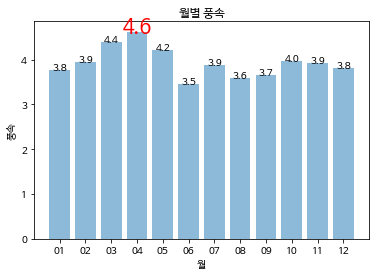

In [ ]:
# x: 월
# y: 일
# 막대그래프 출력, 자료구조 변환 -> 리스트 

wind = df_group

y = wind.tolist() # 풍속
x = wind.index.tolist() #인덱스, 월

plt.bar(x, y, alpha = 0.5) 

plt.title('월별 풍속')
plt.xlabel('월')
plt.ylabel('풍속')

for i in range(len(x)):
    if y[i] == max(y):
      plt.text(i,y[i], round(y[i],1) ,ha = 'center', size='20',color='r')
    else : 
      plt.text(i,y[i], round(y[i],1) ,ha = 'center')
plt.show()
